# Prediction on MobileNetV2 model

## Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

## Configuration

In [5]:
# --- Configuration ---
MODEL_PATH = 'mobilenetv2_model.h5'
IMAGE_PATH = './test/glioma/Tr-gl_0017.jpg' 
IMG_SIZE = (256, 256)
CLASS_LABELS = ['glioma', 'meningioma', 'notumor', 'pituitary']

## Load model

In [7]:
# --- Load the trained model ---
model = load_model(MODEL_PATH)

## Load and Preprocess the image

In [9]:
# --- Load and preprocess the image ---
img = load_img(IMAGE_PATH, target_size=IMG_SIZE)
img_array = img_to_array(img)
img_array = img_array / 255.0 
img_array = np.expand_dims(img_array, axis=0) 

## Predict

In [11]:
# --- Predict ---
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


## Result

In [13]:
# --- Output ---
print(f"Predicted Class: {CLASS_LABELS[predicted_class]}")
print(f"Confidence: {confidence:.2f}")

Predicted Class: glioma
Confidence: 0.95


## Display image

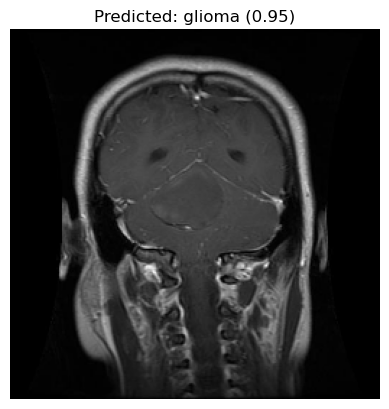

In [15]:
# --- Display the image ---
plt.imshow(img)
plt.title(f"Predicted: {CLASS_LABELS[predicted_class]} ({confidence:.2f})")
plt.axis('off')
plt.show()